# Logistic Regression

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\VIVEK\OneDrive\Desktop\AI-ML\CSV files\IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
x = df.iloc[:,0:4].values
y = df.iloc[:,-1:].values

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
log_reg = LogisticRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 1)
st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.fit_transform(x_test)
y_train = np.ravel(y_train)

In [5]:
log_reg.fit(x_train,y_train)
y_pred = log_reg.predict(x_test)

In [6]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Accuracy Score:',accuracy_score(y_test,y_pred)*100)
print()
print('confusion matrix:\n',confusion_matrix(y_test,y_pred))
print()
print('Classification Report:')
print(classification_report(y_test,y_pred))

Accuracy Score: 95.55555555555556

confusion matrix:
 [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



# KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
kn_clas = KNeighborsClassifier(n_neighbors=6,metric='minkowski',p=2)
kn_clas.fit(x_train,y_train)
y_predk = kn_clas.predict(x_test)

In [8]:
y_train.shape

(105,)

In [9]:
print(accuracy_score(y_test,y_predk)*100)

95.55555555555556


In [10]:
knn_cm=confusion_matrix(y_test,y_predk)
print('Confussion Matrix')
print(knn_cm)
print()
print('Classification Report:')
print(classification_report(y_test,y_predk))

Confussion Matrix
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [11]:
e = []
for i in range(1,40):
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(x_train,y_train)
    y_p = kn.predict(x_test)
    e.append(accuracy_score(y_test,y_p))


Text(0, 0.5, 'Accuracy')

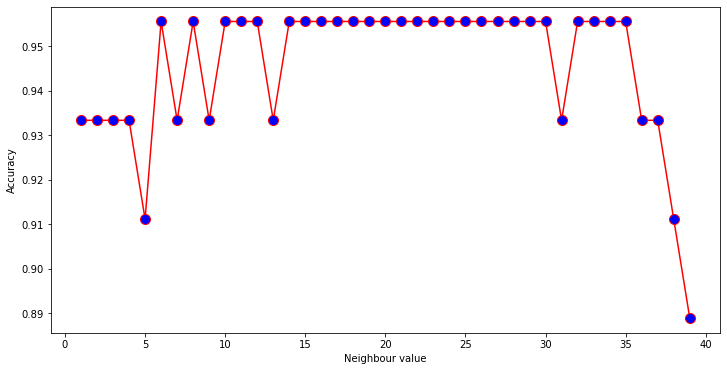

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot(range(1,40),e,'r-',marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('Neighbour value')
plt.ylabel('Accuracy')


<h4> We applied Logistic Regression and KNN on IRIS Dataset</h4>
<p> We found that the Logistic Regression accuary was found to be 95%<br>
    The Accuracy of KNN was found to 95% when n_neighbour=8.